In [33]:
from pydub import AudioSegment
from pydub.playback import play
import ffmpeg #for example for mp3 files as they are not default for pydub lib
import speech_recognition as sr
import wave #for audio files analysis
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Kacper\anaconda3\envs\NLP\lib\site-packages\pydub\utils.py:184: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [42]:
good_morning = wave.open('audiofiles/raz.wav', 'r')
signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm)
print(len(soundwave_gm))
print(max(soundwave_gm))

[0 0 0 ... 0 0 0]
1140250
1655


In [26]:
framerate_gm = good_morning.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.26757568e-05 4.53515137e-05 6.80272705e-05
 9.07030274e-05 1.13378784e-04 1.36054541e-04 1.58730298e-04
 1.81406055e-04 2.04081812e-04]


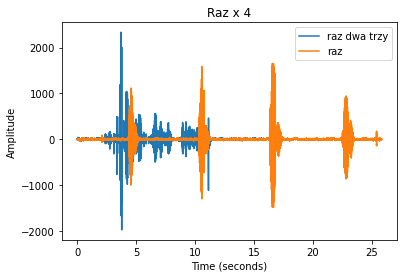

In [40]:
# Setup the title and axis titles
plt.title('Raz x 4')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

good = wave.open('audiofiles/firstaudio.wav', 'r')
signal_g = good.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_g = np.frombuffer(signal_g, dtype='int16')

framerate_g = good.getframerate()

# Find the sound wave timestamps
time_g = np.linspace(start=0,
                      stop=len(soundwave_g)/framerate_g,
                      num=len(soundwave_g))


# Add the Good Morning data to the plot
plt.plot(time_g, soundwave_g, label='raz dwa trzy')
plt.plot(time_gm, soundwave_gm, label='raz')

plt.legend()
plt.show()

In [38]:
wav_file = AudioSegment.from_file(file='audiofiles/raz.wav', 
                                  format="wav")
    1Q
# Play the audio file
play(wav_file)

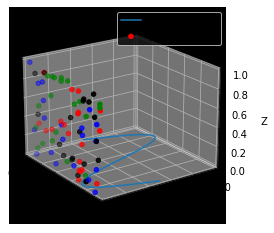

In [57]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()